# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [3]:
iris_data = pd.read_csv("IRIS.csv")

# Display the first few rows of the dataset to understand its structure

In [4]:
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# List down features and their types

In [5]:
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# Create histograms for each feature

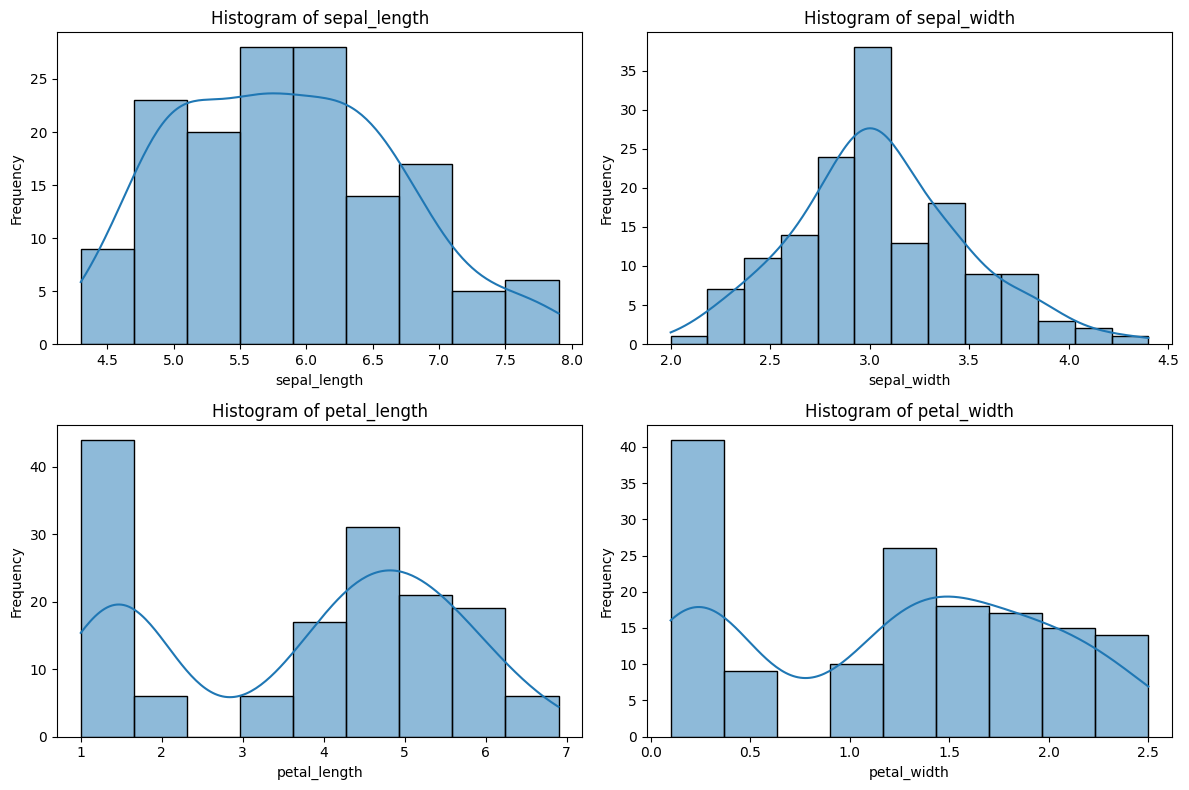

In [6]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create boxplots for each feature

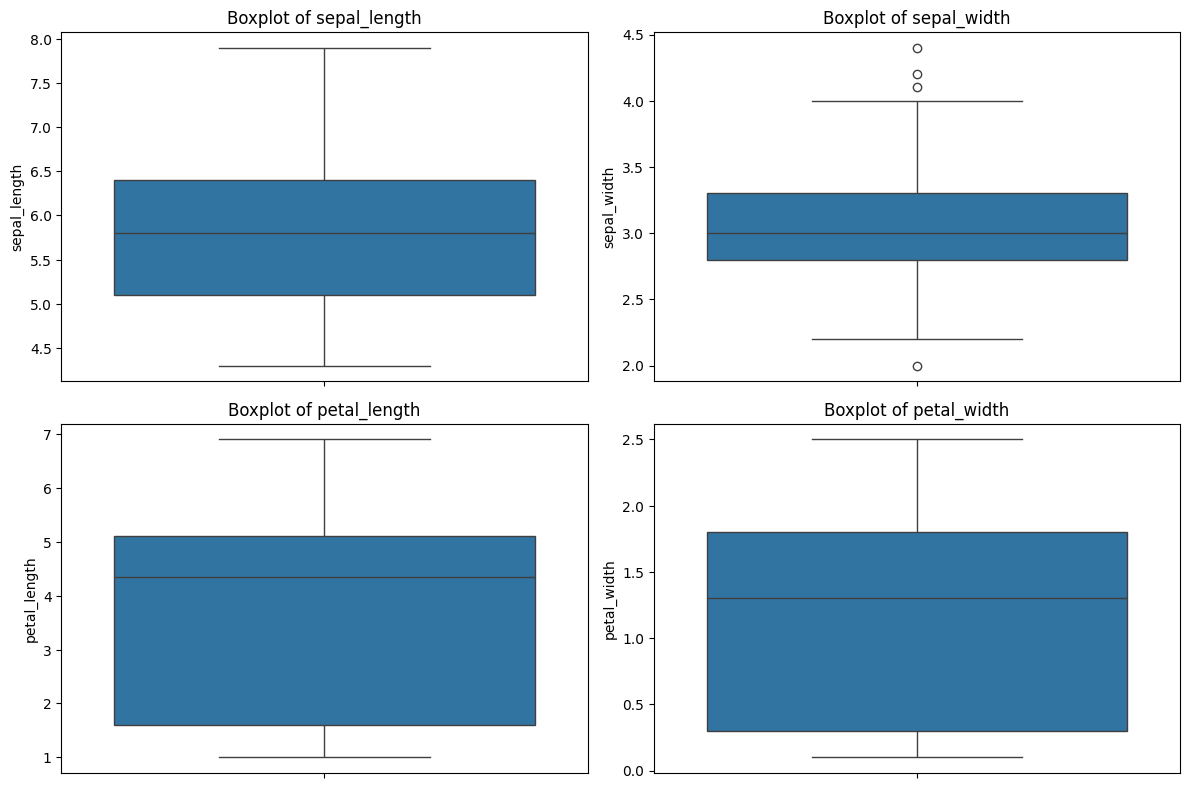

In [7]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=iris_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Compare distributions visually using histograms and boxplots

# Calculate and display outliers using the Interquartile Range (IQR) method

In [12]:
outliers = {}
for feature in iris_data.columns[:-1]:
    Q1 = iris_data[feature].quantile(0.25)
    Q3 = iris_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_outliers = iris_data[(iris_data[feature] < lower_bound) | (iris_data[feature] > upper_bound)][feature]
    outliers[feature] = feature_outliers

# Display outliers

In [13]:
print("Outliers:")
for feature, values in outliers.items():
    if not values.empty:
        print(f"Feature: {feature}, Outliers: {values.values}")

Outliers:
Feature: sepal_width, Outliers: [4.4 4.1 4.2 2. ]
